<table>
    <tr>
        <td><img src="./Macc.png" width="auto"/></td>
        <td>
            <table><tr>
            <h1 style="color:red;text-align:center">Probabilidad y estadística</h1></td>
            </tr></table>   
        <td>&nbsp;</td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Proyecto</p></tp>
            <tp><p style="font-size:100%;text-align:center">Análisis estudiantes --Entrega Final</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

**<h1 style="text-align:center">Análisis estadístico del rendimiento académico de los estudiantes</h1>**
<br/>


### **Introducción, contexto y problemas <a class="anchor" id="forms"></a>**

El bajo rendimiento académico de los estudiantes de colegio es un problema que se compone de muchos factores, a pesar de que se pueda pensar que un niño es poco inteligente o muy inteligente dependiendo de sus notas, estas revelan realidades mucho mas allá del simple entendimiento de un estudiante en una materia.
En nuestro proyecto, decidimos analizar una base de datos de dos escuelas de brasil que contiene la informacion de los estudiantes que ven dos materias distintas, portugues y matemáticas, los datos incluyen, no solo las notas divididas por periodo sino tambien, el genero del estudiante, la edad, tamaño de la familia, nivel de educacion y trabajo de madre y padre, tiempo de estudio, razon de escoger su colegio, tutorias extras, relación con la familia, tiempo libre, salud, y muchos factores más.
Usando estos datos, vamos a analizar cuales son los mas relevantes en el desempeño estudiantil de un joven, y cuales tienen más probabilidad de afectar sustancialmente en los resultados, analizaremos tambien cuales de estos datos tienen alguna correlación entre ellos y como afecta a la conclusion de las notas el ver estos datos como conjunto.

### **Secciones <a class="anchor" id="inicio"></a>**

1. [Conjunto de datos y diccionario de variables](#2)
2. [Visualización y analisis descriptivo](#3)
3. [Estimaciones puntuales y por intervalos](#4)
4. [Pruebas de hipótesis sobre parámetros](#5)
5. [Regresión lineal](#6)
6. [Pruebas de hipótesis sobre bondad de ajuste](#7)
7. [(Depronto no va)Análisis descriptivo bivariado, verificacion de supuestos y analisis de coeficientes](#8)
8. [Resumen ejecutivo](#9)

### **Conjunto de datos y diccionario de variables <a class="anchor" id="forms"></a>**


Los datos relacionados con el problema y sus analisis fueron extraidos del siguiente repositorio:
<a href="https://doi.org/10.24432/C5TG7T" class="anchor" id="forms">UCI Machine Learning Repository</a>.

Este repositorio de datos aborda el rendimiento de algunos estudiantes de educación secundaria de dos escuelas portuguesas. Tiene 32 atributos, entre estos estan las notas, factores demograficos, sociales y relacionados con la escuela. Fue recolectada usando reportes de la propia escuela y cuestionarios. Incluye dos conjuntos de datos, uno para el rendimiento en el área de matematicas y otro para el rendimiento en el área de lenguaje.

<a class="anchor">Diccionario de variables:</a>

In [142]:
import pandas as pd                 # Procesamiento de datos, CVS I/O

In [143]:
st_mat = pd.read_csv('./student/student-mat.csv', sep=';') # Conjunto de datos de las notas de matemáticas
st_por = pd.read_csv('./student/student-mat.csv', sep=';') # Conjunto de datos de las notas de lenguaje

In [144]:
st_mat.keys() # lista de todos los atributos

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [145]:
st_mat.head() # Ejemplo de los registros

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### **Visualización y analisis descriptivo <a class="anchor" id="3"></a>**
<tp><p style="font-size:100%;text-align:center">A continuación tenemos una sección donde se analizaran ciertos factores, con respecto a las notas y su promedio.
Para la visualización de estas gráficas usamos una libreria de python llamda Seaborn la cual está basada en Matplotlib, y se integra con las estructuras de Pandas</p></tp>



En el siguiente bloque, graficaremos un histograma el cual nos muestra el promedio de los estudiantes en ambas materias, los ejes funcionan de la siguiente manera.                                                             
**X**: Muestra el rango de notas posibles.                                                                           
**Y**: Muestra la cantidad de estudiantes que recaen en las notas del eje x.

Notas promedio de matemáticas


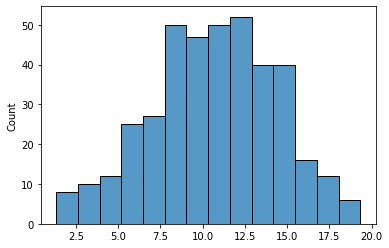

Notas promedio de lenguaje


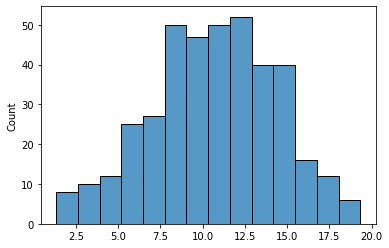

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np

print("Notas promedio de matemáticas")
seaborn.histplot((st_mat.G1+st_mat.G2+st_mat.G3)/3)
plt.show()

print("Notas promedio de lenguaje")
seaborn.histplot((st_por.G1+st_por.G2+st_por.G3)/3)
plt.show()

A continuación por medio de una tabla, se mostrarán La media, Desviación estandar, cantidad de datos, el mínimo y máximo dato, esto por cada factor que analiza el rendimiento de los estudiantes, junto con dos columnas añadidas, que serían La aprobación de la materia y el promedio general de esta materia.
Tenga en cuenta que este análisis únicamente se hace con la clase de matemáticas.

In [147]:
st_mat["promedio"] = (st_mat.G1+st_mat.G2+st_mat.G3)/3
st_mat["aprobado"] = np.where(st_mat.promedio >= 10, 1, 0)
st_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,promedio,aprobado
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.00000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.679325,0.58481
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.696786,0.49338
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.333333,0.00000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.333333,0.00000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.666667,1.00000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.333333,1.00000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333,1.00000


(no se si hacer aca todos los histogramas de todas las variables o al menos las importantes)
(depronto tambien otro tipo de graficos)

(depronto algo sobre curtosis y simetria)

(Aca hacer el histograma que habia dicho juanes comparando con subpoblacion.
luego se dice que se encuentra una diferencia y entonces por eso se va a hacer la estimacion de la proporcion muestral)

### **Estimaciones puntuales y por intervalos <a class="anchor" id="4"></a>**





A continuación realizaremos una serie de estimaciones, evaluadas en una distribución binomial, donde compararemos $X_i:$ cantidad de estudiantes que aprobaron la materia dado que un evento $_i$ ocurra. Por lo que 

### **Pruebas de hipótesis sobre parámetros <a class="anchor" id="5"></a>**




(h1 matematicas mas dificl de pasar que por)

(h2 diferencia de media de nota entre varias subpoblaciones para decir si cierta variable afecta la nota)

### **Regresión lineal <a class="anchor" id="6"></a>**



### **Pruebas de hipótesis sobre bondad de ajuste <a class="anchor" id="7"></a>**




### **()Análisis descriptivo bivariado, verificacion de supuestos y analisis de coeficientes <a class="anchor" id="8"></a>**


### **Resumen ejecutivo <a class="anchor" id="9"></a>**


